In [1]:
import sys
sys.path.append('/Users/simon/git/burns/code/')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data_dir = '/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/'


In [104]:
group1 = ['MSS1','MSS5','MSS6','MSS7','MSS8']
group2 = ['MSS10','MSS11','MSS14']
files1 = []
files2 = []
for g in group1:
    pattern = data_dir + g + 'a' + '*.mzML'
    matches = glob.glob(pattern)
    for match in matches:
        end_bit = match.split('/')[-1]
        bfile = end_bit.split('a')
        bfilename =  "".join(bfile[:-1]) + 'b' + bfile[-1]
        files1.append((match,data_dir+bfilename))
for g in group2:
    pattern = data_dir + g + 'a' + '*.mzML'
    matches = glob.glob(pattern)
    for match in matches:
        end_bit = match.split('/')[-1]
        bfile = end_bit.split('a')
        bfilename =  "".join(bfile[:-1]) + 'b' + bfile[-1]
        files2.append((match,data_dir + bfilename))

group1,_ = zip(*files1)
group2,_ = zip(*files2)



In [105]:
from load_di import load_di

# s = load_di(group1[0])
import glob
data = {}
for f in files1+files2:
    out_file = '../csv_files/' + f[0].split('/')[-1].split('.')[0]+'.csv'
    data[f[0]] = load_di(f[0],blank_file = f[1],out_file = out_file)
#     data[f[0]] = load_di(f[0],out_file = out_file)

Do some of Greedy matching

In [110]:
from matching import Greedy
g = Greedy()
mp= g.process(data,5)
from scipy.stats import ttest_ind
small = 0.001
test_results = []
for ps in mp:
    g1 = []
    g2 = []
    for p in ps.peaks:
        filename = p[2]
        if filename in group1:
            g1.append(p[1])
        else:
            g2.append(p[1])
    if len(g1) < 2 or len(g2) < 2:
        continue
    else:
#         for i in range(len(g1),len(group1)):
#             g1.append(small)
#         for i in range(len(g2),len(group2)):
#             g2.append(small)
#         for i,g in enumerate(g1):
#             if g < small:
#                 g1[i] = small
#             g1[i] = np.log(g1[i])
#         for i,g in enumerate(g2):
#             if g < small:
#                 g2[i] = small
#             g2[i] = np.log(g2[i])

        
        t,p = ttest_ind(g1,g2,equal_var=False)
        test_results.append((ps,t,p,g1,g2))
        
test_results = sorted(test_results,key = lambda x: x[2])
import numpy as np
for ps,t,p,g1,g2 in test_results:
    if np.floor(ps.mean_mz) == 102:
        print ps.mean_mz,p
#         g1peaks = []
#         g2peaks = []
#         for p in ps.peaks:
#             if p[2] in group1:
#                 g1peaks.append(p)
#             else:
#                 g2peaks.append(p)
#         print "Group1:"
#         for p in g1peaks:
#             print '\t',p[1],p[2]
#         print
#         print "Group2:"
#         for p in g2peaks:
#             print '\t',p[1],p[2]
#         print
        print
        for g in g1:
            print g
        print
        for g in g2:
            print g
        print
        print
        print
        print
        print
        

7491 peaks
102.091583352 0.230161398544

1.57450115524
0.360032811362
0.588909720814
1.87464425488
0.981577085276

0.693112084574
0.512753941247
1.07179166807
0.246843498165





102.970497071 0.440411015595

32.1913682257
4.58295787292
18.2281674524
28.2488086402

44.5449185191
23.7404943671
16.3855255813
6.24268367565
31.9010265685
45.2983552513







[((81.5208271985,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS11a.mzML) (81.5208290112,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS14a.mzML) (81.5208316111,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS5a.mzML) (81.5208379352,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS1a.mzML) (81.5208450422,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS6a.mzML) (81.5208544656,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS10a.mzML), -5.0787391312447667, 0.0070869692699838541), ((97.991537038,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS5a.mzML) (97.991555291,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS1a.mzML) (97.9915751477,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS6a.mzML) (97.9916003598,/Users/simon/Dropbox/BioResearch/Meta_clustering/Burns/simon_test/MSS14a.mzML) (97.9916114092,/Use

In [229]:
for p in mp:
    if len(p.peaks) == 6:
        print p

(70.0128232796,MSS5a) (70.0128258618,MSS1a) (70.0128414759,MSS6a) (70.0128483179,MSS14a) (70.0128620229,MSS11a) (70.0128728061,MSS10a)
(70.9806655117,MSS5a) (70.9806672059,MSS1a) (70.9806931885,MSS14a) (70.980696867,MSS11a) (70.9807058168,MSS10a) (70.9807151856,MSS6a)
(71.9521066639,MSS5a) (71.9521305499,MSS6a) (71.9521326705,MSS1a) (71.9521400038,MSS11a) (71.9521538437,MSS14a) (71.952176045,MSS10a)
(74.975601179,MSS14a) (74.975604677,MSS11a) (74.9756083535,MSS5a) (74.9756102873,MSS1a) (74.9756230501,MSS10a) (74.9756237203,MSS6a)
(78.5204746348,MSS5a) (78.5204904729,MSS1a) (78.5205002471,MSS14a) (78.5205169387,MSS6a) (78.5205231207,MSS11a) (78.520526807,MSS10a)
(80.0497230208,MSS14a) (80.0497331635,MSS5a) (80.0497354895,MSS11a) (80.0497414349,MSS1a) (80.049756476,MSS10a) (80.0497577777,MSS6a)
(81.0700988708,MSS5a) (81.0701093872,MSS1a) (81.0701323851,MSS14a) (81.070157634,MSS11a) (81.0701596277,MSS6a) (81.0701790174,MSS10a)
(81.5208271985,MSS11a) (81.5208290112,MSS14a) (81.5208316111,M

In [121]:
s = sorted(s,key = lambda x: x[0])
blanks = sorted(blanks,key = lambda x: x[0])
print s

[(70.01287280606142, 65347608.0), (70.51453284165632, 2560842.25), (70.98070581677707, 9081548.0), (71.51269356802491, 2055261.75), (71.95217604499183, 11394235.0), (72.5205156757884, 812039.75), (73.01252589781912, 1086694.75), (73.53208417017125, 819057.0625), (74.02035758566144, 2428790.5), (74.51799541194028, 1980834.5), (74.97562305006979, 29795856.0), (76.01782437131213, 3841201.0), (77.02070429283205, 1511110.25), (77.5127009242014, 492380.9375), (78.02292285665287, 1950474.875), (78.52052680702275, 33305310.0), (79.01816359044689, 23461582.0), (79.51983652588028, 1207724.625), (80.04975647596952, 1118559.875), (80.51799006215934, 2580630.25), (81.01461730077837, 1015491.25), (81.07017901744625, 645726.25), (81.5208544655592, 23188784.0), (82.01447794582624, 2195987.5), (82.537385456772, 1465133.25), (83.02563621346975, 2651063.75), (83.51730349815818, 684032.0625), (84.01529117614353, 618789.1875), (84.52055125829615, 285889.15625), (84.95996117965643, 166026624.0), (85.5283475

616.834394748


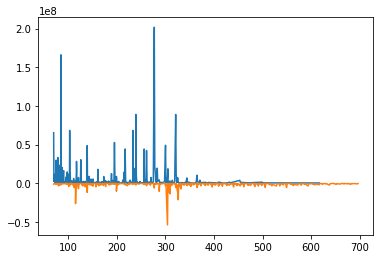

In [122]:
x = [p[0] for p in s]
y = [p[1] for p in s]
%matplotlib inline
plt.plot(x,y)
xb = [p[0] for p in blanks]
yb = [-p[1] for p in blanks]
plt.plot(xb,yb)
print max(x)


In [109]:
import numpy as np
mz,inte = zip(*s)
mz = np.array(mz)
inte = np.array(inte)
print mz[inte.argmax()]

ss = sorted(s,key = lambda x: x[1],reverse=True)
print ss[1:10]

277.1050503
[(84.95996117965643, 166026624.0), (239.14931644809047, 88939096.0), (321.1314147488065, 88937840.0), (102.97052830288665, 68308792.0), (233.07871500336745, 68201592.0), (70.01287280606142, 65347608.0), (195.1229599996206, 52675704.0), (300.2018366040333, 49075284.0), (139.051834892675, 48646380.0)]


In [46]:
new_traces = []
mtd.run(new_exp,new_traces)

In [63]:
pp = PeakPickerCWT()
pa = pp.getParameters()
pa['peak_width'] = 0.0001
pa['signal_to_noise'] = 0.0
pp.setParameters(pa)
print pp.getParameters()['peak_width']
print pa.asDict()

0.0001
{'thresholds:search_radius': 3, 'deconvolution:fitting:penalties:left_width': 0.0, 'centroid_percentage': 0.8, 'SignalToNoiseEstimationParameter:auto_max_percentile': 95, 'fwhm_upper_bound_factor': 20.0, 'deconvolution:deconvolution': 'false', 'deconvolution:fitting:eps_rel': 9.999999747378752e-06, 'deconvolution:fitting:penalties:position': 0.0, 'deconvolution:right_width': 2.0, 'peak_width': 0.0001, 'signal_to_noise': 0.0, 'SignalToNoiseEstimationParameter:auto_mode': 0, 'thresholds:peak_bound': 10.0, 'deconvolution:fitting:eps_abs': 9.999999747378752e-06, 'SignalToNoiseEstimationParameter:win_len': 200.0, 'deconvolution:scaling': 0.12, 'deconvolution:left_width': 2.0, 'SignalToNoiseEstimationParameter:stdev_mp': 3.0, 'optimization:penalties:right_width': 1.0, 'SignalToNoiseEstimationParameter:noise_for_empty_window': 1e+20, 'deconvolution:asym_threshold': 0.3, 'optimization:iterations': 400, 'wavelet_transform:spacing': 0.001, 'thresholds:correlation': 0.5, 'deconvolution:fit

In [64]:
new_exp = MSExperiment()
pp.pickExperiment(exp,new_exp)

In [78]:
from load_di import load_di
s = load_di(files1[2][0])
sb = load_di(files1[2][0],
            blank_file = files1[2][1])
sbb = load_di(files1[2][1])

61863456.0
(84.95993757856455, 8377827.5) (84.95993757856455, 0.0) 84.9599585149 38094412.0
(304.2481753018171, 38435340.0) (304.2481753018171, 4847112.0) 304.24818654 33588228.0
(192.1595643249783, 61863456.0) (192.1595643249783, 33119306.0) 192.159558406 28744150.0
(80.04972245481963, 21946402.0) (80.04972245481963, 0.0) 80.0497317848 26216830.0
(199.1692635293678, 23775262.0) (199.1692635293678, 495858.0) 199.169365449 23279404.0
(102.97043476334714, 5372616.0) (102.97043476334714, 0.0) 102.970521634 22680874.0
(145.01743944402511, 3407932.0) (145.01743944402511, 0.0) 145.017448072 20400846.0
(287.22168022372153, 15703595.0) (287.22168022372153, 0.0) 287.221683132 16661307.0
(111.1169986624358, 11643667.0) (111.1169986624358, 1006845.0) 111.117011245 10636822.0
(125.98647162355783, 2532898.0) (125.98647162355783, 0.0) 125.986472272 9734554.0
(70.01283056482765, 3057418.25) (70.01283056482765, 0.0) 70.0128405003 8991263.0
(74.97558273230746, 3076676.25) (74.97558273230746, 0.0) 74.97

(92.05779672623545, 223881.6875) (92.05779672623545, 17719.859375) 92.0578055904 206161.828125
(132.102049212655, 478782.71875) (132.102049212655, 272760.140625) 132.102152132 206022.578125
(128.03201547066502, 297520.09375) (128.03201547066502, 92890.625) 128.032014051 204629.46875
(73.53202935763771, 208084.140625) (73.53202935763771, 3842.765625) 73.5320523116 204241.375
(130.050095509935, 347728.84375) (130.050095509935, 146439.75) 130.050094046 201289.09375
(515.3200171457106, 319304.40625) (515.3200171457106, 118879.5) 515.320097019 200424.90625
(294.206494554375, 188588.296875) (294.206494554375, 0.0) 294.206501479 199523.890625
(227.16429519278051, 89830.578125) (227.16429519278051, 0.0) 227.16433513 197531.59375
(213.1850386844234, 155617.453125) (213.1850386844234, 0.0) 213.18517409 197381.640625
(143.00169825495252, 175836.375) (143.00169825495252, 0.0) 143.001735845 197337.0625
(197.1538073044776, 194932.28125) (197.1538073044776, 83.734375) 197.153872413 194848.546875
(214

In [71]:
import pylab as plt
%matplotlib inline

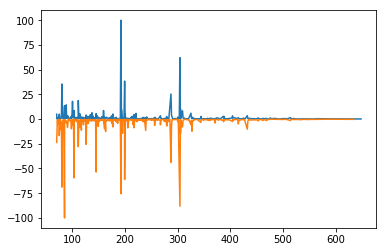

In [76]:
x,y = zip(*s)
plt.plot(x,y)
x2,y2 = zip(*sbb)
plt.plot(x2,[-a for a in y2])
plt.figure()
# plt.plot(x,[a-y2[i] for i,a in enumerate(y)])